# Title: LA Crimes PART 2/2
# Analysis by: Christian Little
# Date: 09/20/2024










In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from tabulate import tabulate
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import fitz  # PyMuPDF
import re




In [2]:
# Load the first CSV file
df = pd.read_csv(r"C:\Users\bliss\OneDrive\Documents\Analysis projects\Crime_Data_from_2020_to_Present (1).csv")



## Needed code from part 1 to show visuals

In [3]:
# Creating a dictionary to change old column names to more descriptive new ones. This adjustment is necessary to enhance readability and understanding of the dataset.

rename_dict = {
    'Date Rptd': 'Date_reported',
    'DATE OCC': 'Date_occured',
    'Crm Cd Desc': 'Crime_description',
    'Vict Age': 'Victim_age',
    'AREA NAME': 'Area_name',
    'Vict Sex' : 'Vict_sex',
    'Premis Desc' : 'Premis_description',
    'Weapon Desc' : 'Weapon_description',
    
    
}

# Rename the columns
df = df.rename(columns=rename_dict)

# Verify the changes
print(df.columns)



Index(['DR_NO', 'Date_reported', 'Date_occured', 'TIME OCC', 'AREA',
       'Area_name', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crime_description',
       'Mocodes', 'Victim_age', 'Vict_sex', 'Vict Descent', 'Premis Cd',
       'Premis_description', 'Weapon Used Cd', 'Weapon_description', 'Status',
       'Status Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4',
       'LOCATION', 'Cross Street', 'LAT', 'LON'],
      dtype='object')


In [4]:
df['Date_reported'] = pd.to_datetime(df['Date_reported'], format='%m/%d/%Y %I:%M:%S %p')
df['Date_occured'] = pd.to_datetime(df['Date_occured'], format='%m/%d/%Y %I:%M:%S %p')


In [5]:
# Extract the year from 'Date_occured'
df['Year'] = df['Date_occured'].dt.year

# Group by the year and 'Crime_description', count the occurrences
crime_summary = df.groupby(['Year', 'Crime_description']).size().reset_index(name='Count')
# Sort the results in ascending order by year
crime_summary_sorted = crime_summary.sort_values(by='Year', ascending=True)
display(crime_summary_sorted)





,Year,Crime_description,Count
0,2020,ARSON,665
94,2020,SEXUAL PENETRATION W/FOREIGN OBJECT,327
93,2020,"SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W...",291
92,2020,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,304
91,2020,ROBBERY,6896
...,...,...,...
430,2023,CRIMINAL HOMICIDE,247
429,2023,"CREDIT CARDS, FRAUD USE ($950.01 & OVER)",13
428,2023,"CREDIT CARDS, FRAUD USE ($950 & UNDER",10
458,2023,HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE,20


In [6]:
# Define the years of interest
years_of_interest = [2020, 2021, 2022, 2023]

# Filter the rows for the specified years and count the occurrences
crimes_per_year = df[df['Year'].isin(years_of_interest)].groupby('Year').size()
# Print the number of crimes per specified year
display("Number of crimes recorded per year:")
display(crimes_per_year)



'Number of crimes recorded per year:'

Year
2020    199398
2021    209334
2022    234199
2023    172951
dtype: int64

# PART 2: Visualization 

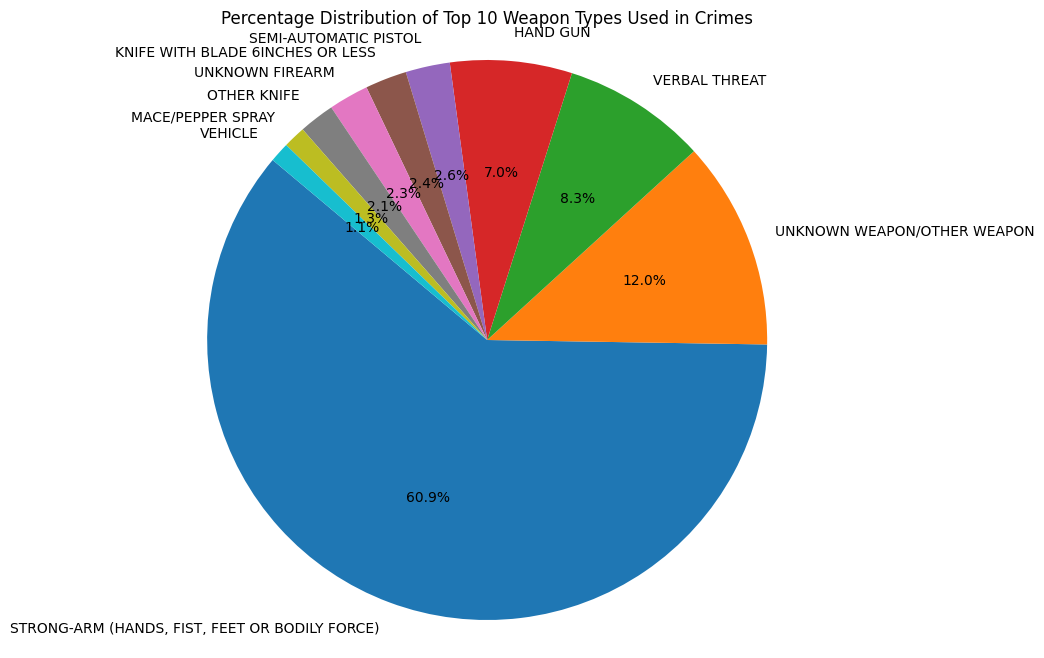

In [7]:
# Count occurrences of each weapon description and select the top 10
weapon_counts = df['Weapon_description'].value_counts().nlargest(10).reset_index()
weapon_counts.columns = ['Weapon_description', 'Count']
# Set the size of the plot
plt.figure(figsize=(10, 8))

# Create a pie chart of the top 10 weapon types
plt.pie(weapon_counts['Count'], labels=weapon_counts['Weapon_description'], autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Add a title
plt.title('Percentage Distribution of Top 10 Weapon Types Used in Crimes')

# Show the plot
plt.show()



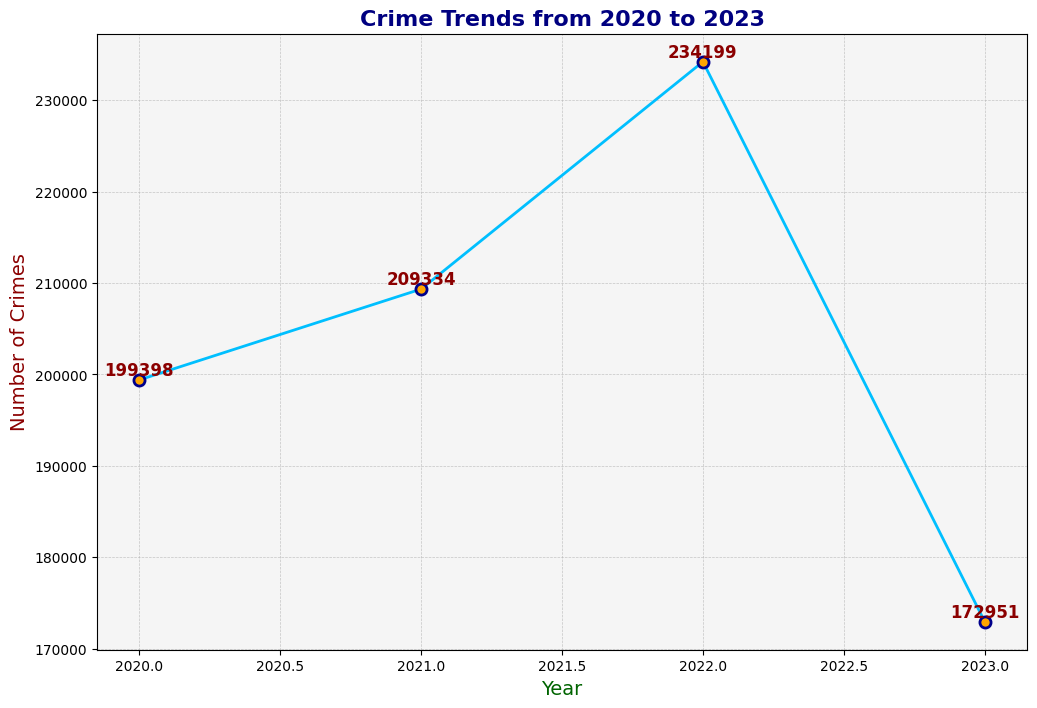

In [8]:

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Plot line chart with enhanced visual style
plt.plot(crimes_per_year.index, crimes_per_year.values, marker='o', linestyle='-', linewidth=2, markersize=8, color='deepskyblue', markerfacecolor='orange', markeredgewidth=2, markeredgecolor='darkblue')

# Customize the title and label fonts
plt.title('Crime Trends from 2020 to 2023', fontsize=16, color='navy', fontweight='bold')
plt.xlabel('Year', fontsize=14, color='darkgreen')
plt.ylabel('Number of Crimes', fontsize=14, color='darkred')

# Enhance grid visibility and style
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Add text annotations with custom styling
for year, count in zip(crimes_per_year.index, crimes_per_year.values):
    plt.text(year, count + 500, f'{count}', fontsize=12, fontweight='bold', color='darkred', ha='center')  # Adjust the y position for better visibility

# Add a background color to the axes
plt.gca().set_facecolor('whitesmoke')  # Light gray background inside the plot area

# Show the plot
plt.show()


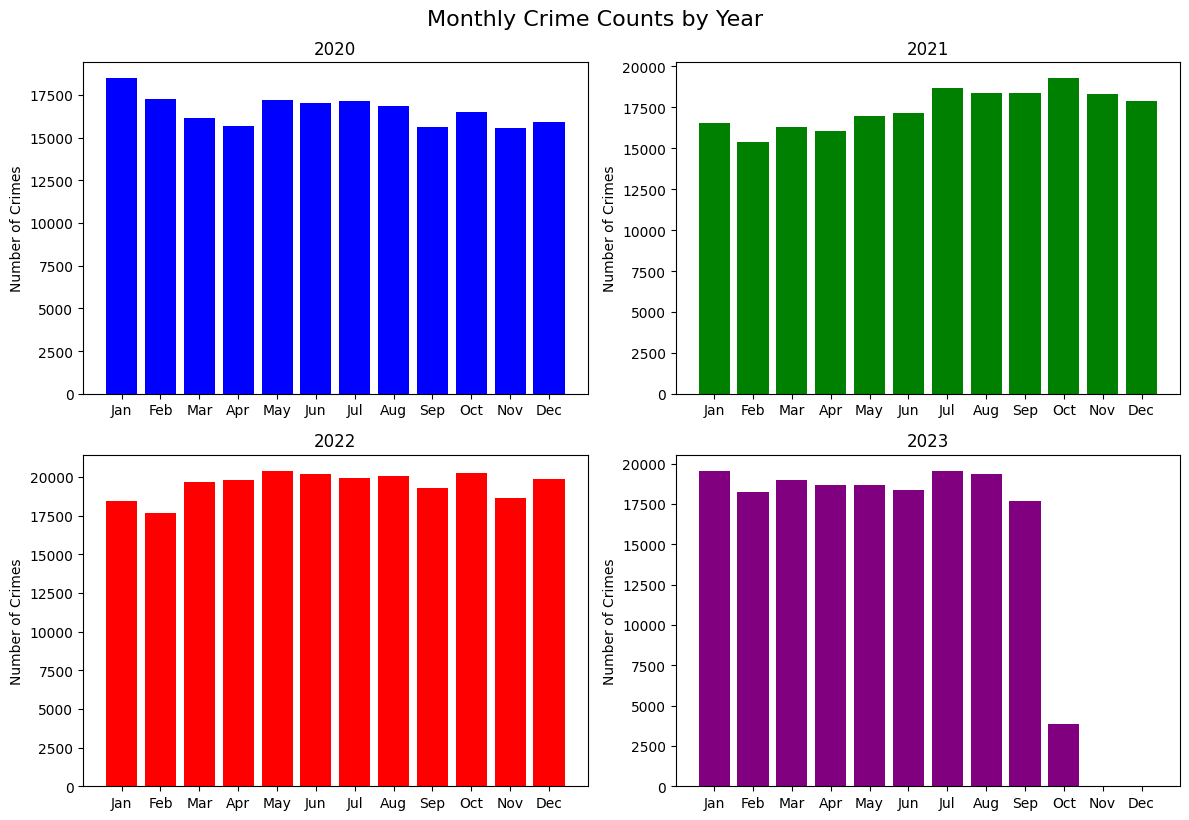

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the crime data CSV file
crime_data_path = r"C:\Users\bliss\OneDrive\Documents\Analysis projects\Crime_Data_from_2020_to_Present (1).csv"
df = pd.read_csv(crime_data_path)

# Ensure 'DATE OCC' column is in datetime format
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')

# Extract year and month from 'DATE OCC'
df['Year'] = df['DATE OCC'].dt.year
df['Month'] = df['DATE OCC'].dt.month

# Filter data for each year
df_2020 = df[df['Year'] == 2020]
df_2021 = df[df['Year'] == 2021]
df_2022 = df[df['Year'] == 2022]
df_2023 = df[df['Year'] == 2023]

# Function to get crime counts by month for a given year, ensuring all months are present
def get_crime_counts_by_month(df, year):
    crime_counts = df['Month'].value_counts().sort_index().reindex(range(1, 13), fill_value=0).reset_index()
    crime_counts.columns = ['Month', 'Count']
    crime_counts['Year'] = year
    return crime_counts

# Get crime counts by month for each year
crime_counts_2020 = get_crime_counts_by_month(df_2020, 2020)
crime_counts_2021 = get_crime_counts_by_month(df_2021, 2021)
crime_counts_2022 = get_crime_counts_by_month(df_2022, 2022)
crime_counts_2023 = get_crime_counts_by_month(df_2023, 2023)

# Create subplots for each year
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot for each year
axs[0, 0].bar(crime_counts_2020['Month'], crime_counts_2020['Count'], color='blue')
axs[0, 0].set_title('2020')
axs[0, 0].set_xticks(range(1, 13))
axs[0, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axs[0, 0].set_ylabel('Number of Crimes')

axs[0, 1].bar(crime_counts_2021['Month'], crime_counts_2021['Count'], color='green')
axs[0, 1].set_title('2021')
axs[0, 1].set_xticks(range(1, 13))
axs[0, 1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axs[0, 1].set_ylabel('Number of Crimes')

axs[1, 0].bar(crime_counts_2022['Month'], crime_counts_2022['Count'], color='red')
axs[1, 0].set_title('2022')
axs[1, 0].set_xticks(range(1, 13))
axs[1, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axs[1, 0].set_ylabel('Number of Crimes')

axs[1, 1].bar(crime_counts_2023['Month'], crime_counts_2023['Count'], color='purple')
axs[1, 1].set_title('2023')
axs[1, 1].set_xticks(range(1, 13))
axs[1, 1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axs[1, 1].set_ylabel('Number of Crimes')

# Adjust layout
plt.tight_layout()
plt.suptitle('Monthly Crime Counts by Year', fontsize=16, y=1.02)

# Save the figure as a static image
plt.savefig(r"C:\Users\bliss\OneDrive\Documents\Analysis projects\crime_counts_by_month.png", dpi=300)

# Show the figure
plt.show()


# 2020
+ The most frequently reported crime in 2020 was Vehicle - Stolen with 20,768 incidents, making it the highest reported crime category for the year.


+ Battery - Simple Assault were also among the most common crimes, indicating significant issues with personal safety and property damage.


+ Assault with Deadly Weapon, Aggravated Assault (11,525 incidents) and Intimate Partner - Simple Assault (10,842 incidents) indicate a considerable number of violent confrontations, emphasizing the need for interventions in domestic and interpersonal violence.


+ Theft of Identity (8,761 incidents) was also a notable crime, reflecting concerns over personal data security and the increasing trend of identity theft.

# 2021
+ Vehicle - Stolen incidents increased significantly, highlighting a rising trend in vehicle thefts.


+ Battery - Simple Assault saw a steady of assaults in the year 2021, indicating a continued prevalence of this type of assault.


+ This category saw an increase from 11,525 incidents in 2020 to 12,734 in 2021, reflecting ongoing issues with violent crimes involving weapons.


+ Theft of Identity incidents rose from 8,761 in 2020 to 11,180 in 2021, indicating a growing concern for identity-related crimes.


+ This category saw a decrease from 9,731 incidents in 2020 to 8,250 in 2021, indicating a slight improvement in reducing petty thefts from vehicles. However, this doesnt shy away from the fact that Vehicle stolen are still ranked high. 


# 2022
+ Vehicle - Stolen incidents increased again, from 20,768 in 2020 to 23,671 in 2021, and further to 24,722 in 2022, indicating a persistent rise in vehicle thefts over the three years.


+ Theft of Identity saw a notable increase from 8,761 incidents in 2020 to 11,180 in 2021, and then a sharp rise to 21,731 in 2022, highlighting a growing issue with identity theft.


+ The number of incidents increased from 16,329 in 2020 to 16,190 in 2021, and then to 18,048 in 2022, indicating a steady rise in simple assault cases.


+ Incidents in this category increased from 11,525 in 2020 to 12,734 in 2021, and then to 12,860 in 2022, reflecting ongoing issues with violent crimes involving weapons.


+ The number of incidents rose from 10,842 in 2020 to 11,096 in 2021, and then to 11,155 in 2022, highlighting ongoing issues in domestic violence.


# 2023
+ Total crimes in 2023 were 172,951, a significant decrease from 234,199 in 2022, 209,334 in 2021, and 199,398 in 2020, indicating a general downward trend in overall crime.

+ Vehicle - Stolen incidents decreased to 18,195 in 2023 from 24,722 in 2022, but it remains the top crime for all four years.


+ The number of incidents dropped to 14,376 in 2023 from 18,048 in 2022, 16,190 in 2021, and 16,329 in 2020.


+ Identity theft saw a dramatic increase between 2020 and 2022, followed by a notable decline in 2023.

+ The numbers were relatively stable between 2020 and 2022, with a significant drop in 2023.

# What to understand:
Over the four years from 2020 to 2023, there has been a notable decline in the total number of crimes, with 2023 seeing a significant reduction to 172,951 crimes from a peak of 234,199 in 2022. Vehicle theft consistently remained the most prevalent crime throughout these years, although it too showed a decrease in 2023. Overall, the data suggests a downward trend in both violent and non-violent crimes, reflecting potentially effective crime prevention and intervention measures.









Crime counts across the months for each year show a consistent pattern. There are no drastic fluctuations within a given year, indicating a relatively steady rate of crimes month-to-month.

+ Summer consistently shows higher crime counts across all years, indicating a seasonal spike in criminal activity during June, July, and August.

+ Winter months (December, January, February) generally show steady or slightly lower crime counts compared to other seasons.

# What is this telling us?
Based on these observations, it can be concluded that crimes are more likely to be committed during the summer months, with significant activity also seen in the spring and fall seasons. Winter months tend to have relatively lower or more stable crime rates.

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')


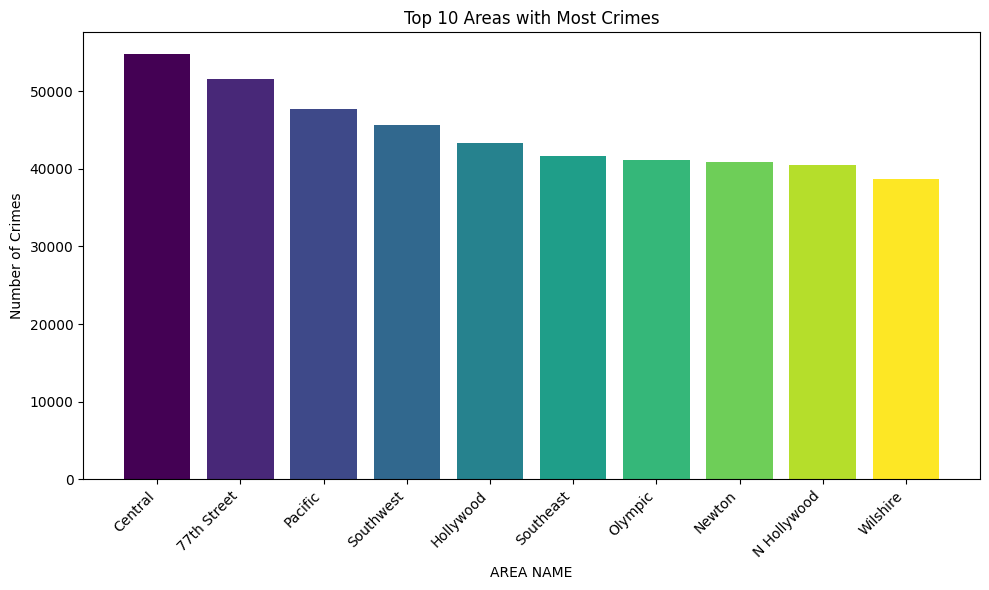

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the crime data CSV file
crime_data_path = r"C:\Users\bliss\OneDrive\Documents\Analysis projects\Crime_Data_from_2020_to_Present (1).csv"
df = pd.read_csv(crime_data_path)

# Print the column names to check for 'AREA NAME'
print(df.columns)

# Clean the column names (optional)
df.columns = df.columns.str.strip()

# Count the occurrences of each area in the AREA NAME column
area_counts = df['AREA NAME'].value_counts()  # Adjust the name based on the printed output

# Select the top 10 areas with the most crimes
top_areas = area_counts.head(10)

# Generate a list of colors for each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(top_areas)))

# Create a static bar chart for the top areas with different colors
plt.figure(figsize=(10, 6))
plt.bar(top_areas.index, top_areas.values, color=colors)
plt.title('Top 10 Areas with Most Crimes')
plt.xlabel('AREA NAME')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the figure as a static image
plt.savefig(r"C:\Users\bliss\OneDrive\Documents\Analysis projects\top_areas_crimes.png", dpi=300)

# Show the figure
plt.show()


The graph illustrates the top 10 areas with the highest reported crime rates, emphasizing the neighborhoods most impacted. In Los Angeles, crime is distributed relatively evenly across the city, affecting even those neighborhoods considered "nice." Each year, we observe over 30,000 crimes being reported in various municipalities. This underscores a pressing issue and highlights the critical need for community awareness and proactive measures to address crime effectively.

# LA Mocodes

In [ ]:

def extract_mo_codes_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    mo_codes = {}
    temp_code = None  # Temporary storage for the code

    for page in doc:
        text = page.get_text("text")
        lines = text.split('\n')
        
        for line in lines:
            if line.isdigit() and len(line) == 4:  # If line is exactly four digits, it's a code
                temp_code = line  # Store the code temporarily
            elif temp_code:  # If a code has been stored and the next line should be the description
                mo_codes[temp_code] = line.strip()
                temp_code = None  # Reset the temp code to ensure correct sequence

    doc.close()
    return mo_codes

# Function to search for an MO code
def search_mo_code(code, mo_codes):
    return mo_codes.get(code, "MO code not found")

# Function to interactively search MO codes
def interactive_search(mo_codes):
    while True:
        code = input("Enter MO code to search (or 'exit' to quit): ")
        if code.lower() == 'exit':
            break
        description = search_mo_code(code, mo_codes)
        print(f"Description for MO code {code}: {description}")

if __name__ == "__main__":
    # Adjust the path as necessary
    pdf_path = r"C:\Users\bliss\Downloads\MO_CODES_Numerical_20180627.pdf"
    mo_codes = extract_mo_codes_from_pdf(pdf_path)
    interactive_search(mo_codes)


In this dataset, it is noted that each crime is linked to multiple police codes, known as MoCodes, which detail various aspects and descriptions of what happened during the incident.



# What to know about Police codes 
This code is designed to extract descriptions of modus operandi (MO) from a PDF file containing MO codes related to crimes. "Modus operandi" is a Latin phrase meaning "method of operating," and it is used by police departments to categorize and describe the methods used in committing crimes. This script can be utilized as an interactive search tool to easily access and understand various crime methodologies described within the PDF.   










# (Click to download Mocodes PDF)
[Download MO Codes PDF](https://data.lacity.org/api/views/d5tf-ez2w/files/8957b3b1-771a-4686-8f19-281d23a11f1b?download=true&filename=MO_CODES_Numerical_20180627.pdf)


# Conclusion:

In conclusion, the detailed analysis of this dataset has provided substantial evidence to form well-informed conclusions. Through this thorough examination, we have uncovered valuable insights, revealing significant patterns and trends that can guide future decisions and strategies. My objective throughout this analysis was to lead readers on a journey that not only presents data but also encourages independent thought and analysis. I aim for readers to identify additional problems and solutions that could benefit Los Angeles and its approach to crime.

As data analysts, our role is to decipher key tasks and tackle the challenges posed by the questions at hand. In my opinion, a pivotal discovery from this dataset is the timing of these crimes relative to the COVID-19 pandemic. The analysis shows a notable increase in crime at the beginning and shows a decrease at end of the pandemic. Initially, as the pandemic disrupted economic norms and public safety measures, there was a semblance of what some might compare to "The Purge," where societal order was perceived as destabilized, leaving citizens in a state of vulnerability. However, as the pandemic progressed and eventually began to wane, these heightened crime rates appeared to subside.

Understanding that every action in life triggers a reaction, soon becomes clear that these components are intricately connected, often with discernible causes when studied over time. The primary objective is to implement preventive measures against any factors that may hinder or impede progress of any given area. Life is composed of multiple layers, both good and bad, and it is our responsibility as individuals to interpret and navigate these subtleties.








![Seal of the LAPD](Seal_of_the_Los_Angeles_Police_Department.png)

